In [155]:
from Bio import Entrez
from Bio import SeqIO
Entrez.email='your@email.com'
#search Genbank, returns accession numbers (up to 100)
handle=Entrez.esearch(db='nucleotide', retmax=3, term="rbcl[All Fields]", idtype="acc") 
record = Entrez.read(handle)
print(handle)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import nltk

df= pd.read_csv("../webmd.csv")
#"C:\Users\52812\"
df['Date'] = pd.to_datetime(df['Date'], format = '%m/%d/%Y')
df.dropna(subset=df.columns.difference(['Reviews']), how='all')

#Sex
df= df[df.Sex != ' ']
df= df[df.Age != ' ']

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331577 entries, 0 to 362805
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Age            331577 non-null  object        
 1   Condition      331577 non-null  object        
 2   Date           331577 non-null  datetime64[ns]
 3   Drug           331577 non-null  object        
 4   DrugId         331577 non-null  int64         
 5   EaseofUse      331577 non-null  int64         
 6   Effectiveness  331577 non-null  int64         
 7   Reviews        331545 non-null  object        
 8   Satisfaction   331577 non-null  int64         
 9   Sex            331577 non-null  object        
 10  Sides          331577 non-null  object        
 11  UsefulCount    331577 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(6)
memory usage: 32.9+ MB
None


In [157]:
df.describe()

,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
count,331577.000000,331577.000000,331577.000000,331577.000000,331577.000000
mean,36079.113072,4.047172,3.541383,3.144938,6.811006
std,51761.458128,1.299587,1.450071,1.608347,9.296080
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4896.000000,3.000000,3.000000,1.000000,1.000000
50%,9353.000000,5.000000,4.000000,3.000000,4.000000
75%,63164.000000,5.000000,5.000000,5.000000,9.000000
max,178546.000000,6.000000,6.000000,6.000000,255.000000


In [2]:
df_new= df
df_new= df_new[df_new.Condition != 'Other']
df_new= df_new[df_new.Condition != ' ']
df_new['Condition'].str.lower()
#df_new= df_new.groupby(['Condition']).count()['DrugId'].reset_index()

#for i in df_new.Condition:
#    if "Nose" in i:
#        df_new.Condition[i] = 'Nose'

df_new.Condition = df_new.Condition.apply(lambda x: 'Depression' if 'Depression' in x else x)
df_new.Condition = df_new.Condition.apply(lambda x: 'Pressure' if 'Pressure' in x else x)
df_new.Condition = df_new.Condition.apply(lambda x: 'Pain' if 'Pain' in x else x)
df_new.Condition = df_new.Condition.apply(lambda x: 'Diabetes' if 'Diabetes' in x else x)
df_new.Condition = df_new.Condition.apply(lambda x: 'Diabetes' if 'Diabetic' in x else x)
df_new.Condition = df_new.Condition.apply(lambda x: 'Poison' if 'Poison' in x else x)
df_new.Condition = df_new.Condition.apply(lambda x: 'HIV' if 'HIV' in x else x)
df_new.Condition = df_new.Condition.apply(lambda x: 'Cold Symptoms' if 'Cold' in x else x)
df_new.Condition = df_new.Condition.apply(lambda x: 'Cold Symptoms' if 'Flu' in x else x)
df_new.Condition = df_new.Condition.apply(lambda x: 'Hiccups' if 'Hiccup' in x else x)
df_new.Condition = df_new.Condition.apply(lambda x: 'Cancer' if 'Cancer' in x else x)
df_new.Condition = df_new.Condition.apply(lambda x: 'Obesity' if 'Obesity' in x else x)
df_new.Condition = df_new.Condition.apply(lambda x: 'Infection' if 'Infection' in x else x)
df_new.Condition = df_new.Condition.apply(lambda x: 'Inflammation' if 'Inflammation' in x else x)
df_new.Condition = df_new.Condition.apply(lambda x: 'Fever' if 'Fever' in x else x)
df_new.Condition = df_new.Condition.apply(lambda x: 'Anemia' if 'Anemia' in x else x)
df_new.Condition = df_new.Condition.apply(lambda x: 'Hemorrhage' if 'Hemorrhage' in x else x)
df_new.Condition = df_new.Condition.apply(lambda x: 'Vitamin Defficiency' if 'Vitamin' in x else x)
df_new.Condition = df_new.Condition.apply(lambda x: 'Immune Response' if 'Immune' in x else x)
df_new.Condition = df_new.Condition.apply(lambda x: 'Sinusitis' if 'Sinusitis' in x else x)
df_new.Condition = df_new.Condition.apply(lambda x: 'Thrombosis' if 'Thrombosis' in x else x)
df_new.Condition = df_new.Condition.apply(lambda x: 'Stuffy Nose' if 'Nose' in x else x)
df_new.Condition = df_new.Condition.apply(lambda x: 'Cancer' if 'Carcinoma' in x else x)
df_new.Condition = df_new.Condition.apply(lambda x: 'Parkinson Symptoms' if 'Quivering' in x else x)
df_new.Condition = df_new.Condition.apply(lambda x: 'Acne' if 'Acne' in x else x)
df_new.Condition = df_new.Condition.apply(lambda x: 'Osteoporosis' if 'Osteoarthritis' in x else x)
df_new.Condition = df_new.Condition.apply(lambda x: 'Osteoporosis' if 'Decreased Bone Mass' in x else x)

df_new.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,2014-09-21,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,2011-01-13,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
6,25-34,Birth Control,2017-06-15,wymzya fe,163180,5,5,Haven't gotten pregnant so it does it's job. I...,2,Female,"Nausea , vomiting , headache , bloating , ...",0
7,45-54,Disease of Ovaries with Cysts,2017-01-30,wymzya fe,163180,5,5,I have take this for 5 years age 45-50 to prev...,5,Female,"Nausea , vomiting , headache , bloating , ...",0
8,25-34,Acne,2016-04-27,wymzya fe,163180,4,2,,2,Female,"Nausea , vomiting , headache , bloating , ...",1


In [66]:
df_new.Condition.unique()

df_new_group= df_new.groupby(['Condition']).count()['DrugId'].reset_index()
df_new_group= df_new_group[df_new_group.DrugId > 20]
df_new_group= df_new_group.sort_values(by='DrugId', ascending= False)
df_new_group.head

<bound method NDFrame.head of                                               Condition  DrugId
693                                                Pain   49313
308                                          Depression   22127
754                                            Pressure   22047
531                                           Infection   11436
143                                       Birth Control   11029
...                                                 ...     ...
253                                    Coin Shaped Rash      21
1002  Too Much Iron in the Blood for a Long Period o...      21
198                                Cannot Empty Bladder      21
1047                            Ulcer from Stomach Acid      21
192                       Calcium Oxalate Kidney Stones      21

[471 rows x 2 columns]>

In [171]:
#Sorting the age values
df_age= df.groupby(['Age']).count()['DrugId'].reset_index()

df_age.Age = df_age.Age.apply(lambda x: '03-6' if '3-6' in x else x)
df_age.Age = df_age.Age.apply(lambda x: '07-12' if '7-12' in x else x)

df_age= df_age.sort_values(by='Age', ascending= True)
df_age

,Age,DrugId
0,0-2,467
4,03-6,808
9,07-12,1596
1,13-18,6687
2,19-24,23163
3,25-34,47958
5,35-44,52735
6,45-54,75996
7,55-64,70127
8,65-74,37922


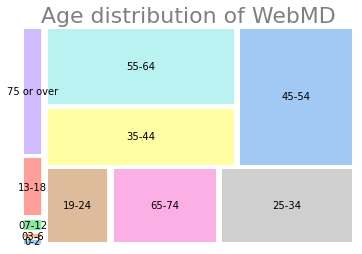

In [11]:
#ETL for Age distribution
df_age= df.groupby(['Age']).count()['DrugId'].reset_index()
df_age.Age = df_age.Age.apply(lambda x: '03-6' if '3-6' in x else x)
df_age.Age = df_age.Age.apply(lambda x: '07-12' if '7-12' in x else x)
df_age= df_age.sort_values(by='DrugId', ascending= True)

color= sns.color_palette("pastel")

#Plot of Age distribution
squarify.plot(sizes=df_age['DrugId'], label=df_age['Age'], alpha= 1, pad = 0.2, color = color)

plt.text(50, 100, 'Age distribution of WebMD', fontsize = 22, color='grey', horizontalalignment='center',
         verticalalignment='bottom', zorder = 20) 
plt.axis('off')
plt.show()

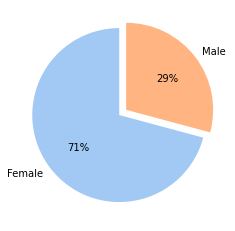

In [20]:
#ETL for Sex distribution
df_sex= df.groupby(['Sex']).count()['DrugId'].reset_index()

#Pie plot of sex distribution
plt.pie(df_sex.DrugId, labels = df_sex.Sex, autopct='%.0f%%', colors=color,startangle=90, explode= (0,0.1))
#plt.text(50, 100, 'Sex distribution of WebMD', fontsize = 22, color='grey', horizontalalignment='center',
#         verticalalignment='bottom', zorder = 20) 
plt.show()

In [24]:
#Most common conditions by age groups
df_cond= df_new.groupby(['Age', 'Condition']).count()['DrugId'].reset_index()
df_cond= df_cond[df_cond.Condition != 'Other']

Ages = df.Age.unique()

df_cond_top= []
m=  {}

for i in Ages:
    m = df_cond[df_cond.Age == i]
    m = m.sort_values(by='DrugId', ascending= False).head()#.to_string(header=False)
    df_cond_top.append(m)

df_cond_top = pd.concat(df_cond_top)
print(df_cond_top)

             Age                                      Condition  DrugId
5198  75 or over                                       Pressure    1860
5178  75 or over                                           Pain    1738
4990  75 or over                                       Diabetes     557
5092  75 or over                                      Infection     442
4956  75 or over                       Chronic Trouble Sleeping     344
1279       25-34                                           Pain    5545
1041       25-34                                     Depression    4577
946        25-34                                  Birth Control    4482
1168       25-34                                      Infection    1872
932        25-34  Attention Deficit Disorder with Hyperactivity    1279
4444       65-74                                           Pain    5215
4476       65-74                                       Pressure    4551
4218       65-74                                       Diabetes 

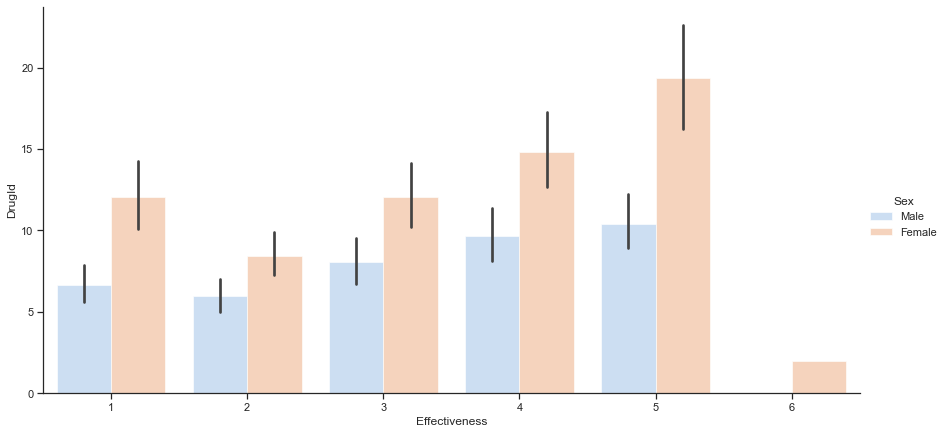

In [11]:
df_cond= df.groupby(['Age', 'Condition', 'Effectiveness', 'Sex']).count()['DrugId'].reset_index()

sns.set_theme(style="ticks", palette="pastel")

sns.catplot(
    data=df_cond , kind="bar",
    x="Effectiveness", y = 'DrugId', hue="Sex", aspect = 2,
    #ci="sd", 
    alpha=.6, height=6, palette = 'pastel'
)

In [28]:
#Heatmap to compare Effectiveness, Satisfaction and Ease of use by Sex
df_heat= df_new[['Age', 'Sex', 'Satisfaction']]
df_heat.Age = df_heat.Age.apply(lambda x: '03-6' if '3-6' in x else x)
df_heat.Age = df_heat.Age.apply(lambda x: '07-12' if '7-12' in x else x)
#df_heat= df.groupby(['Age', 'Sex']).mean(['Satisfaction', 'Effectiveness', 'EaseofUse']).reset_index()
df_heat= df_heat.groupby(['Age', 'Sex']).mean()
df_heat = df_heat.unstack(level=0)

df_heat

c:\Users\52812\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Satisfaction                                                    \
Age             0-2      03-6     07-12     13-18     19-24     25-34   
Sex                                                                     
Female     2.895470  2.839623  2.900125  2.895654  3.023172  3.114908   
Male       2.716667  2.919271  2.953459  3.034238  3.236976  3.238389   

                                                           
Age        35-44     45-54     55-64     65-74 75 or over  
Sex                                                        
Female  3.190540  3.148852  3.061872  3.018920   2.868737  
Male    3.343017  3.321944  3.279131  3.221537   3.192094

c:\Users\52812\anaconda3\lib\site-packages\pandas\core\generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


<AxesSubplot:xlabel='None-None-Condition', ylabel='Age'>

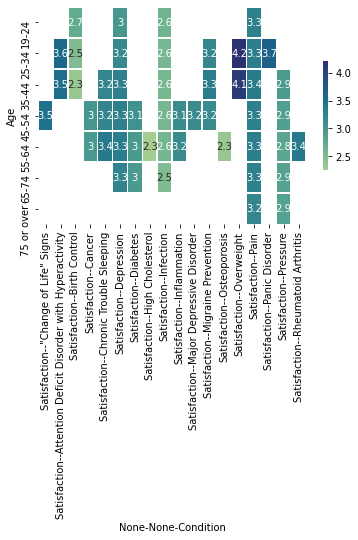

In [126]:
cond= df_cond_top.Condition.unique()

#Choosing data, most relevant conditions
df_heat= df_new[['Condition', 'Age', 'Satisfaction']]
df_heat= df_heat.groupby(['Condition','Age']).agg(['count','mean']).reset_index()
df_heat2= df_heat.xs('Satisfaction', axis=1, drop_level=True)
df_heat= df_heat[['Condition', 'Age']]
df_heat['Size']= df_heat2['count']
df_heat['Satisfaction']= df_heat2['mean']
df_heat= df_heat[df_heat.Size > 1000 ]
df_heat= df_heat.sort_values(by='Size', ascending= False)

#Make the structure for heatmap
df_heat= df_heat[['Condition', 'Age', 'Satisfaction']]
df_heat= df_heat.groupby(['Condition', 'Age']).mean()
df_heat = df_heat.unstack(level=0)

colormap = sns.color_palette("crest", as_cmap=True)
sns.heatmap(data =df_heat, annot = True, cbar_kws={"shrink": .5}, linewidths=.5, cmap = colormap)

In [131]:
df_heat= df_new.groupby(['Condition']).mean(['Satisfaction', 'Effectiveness', 'EaseofUse']).reset_index()
df_heat= df_heat[['Condition', 'Satisfaction', 'Effectiveness', 'EaseofUse']]

df_heat

,Condition,Satisfaction,Effectiveness,EaseofUse
0,"""Change of Life"" Signs",3.487910,3.817358,4.303109
1,A Chronic Multisystem Inflammatory Disorder,4.666667,4.333333,4.555556
2,A Condition in which Hair Falls Out in Patches,4.000000,4.000000,3.500000
3,A Condition of Bladder Dysfunction from Nerve ...,3.448276,3.551724,4.241379
4,A Feeling of Restlessness with Inability to Si...,3.754167,3.912500,4.291667
...,...,...,...,...
1111,osteoporosis in postmenopausal woman at high r...,3.333333,3.333333,5.000000
1112,pemphigus vulgaris,5.000000,5.000000,5.000000
1113,primary progressive multiple sclerosis,1.000000,1.000000,5.000000
1114,raised seborrheic keratosis,1.000000,2.000000,2.000000


In [ ]:
df_sat= df.groupby(['Date', 'Sex']).mean()['Effectiveness'].reset_index()
ax = sns.set(rc={'figure.figsize':(15,10)})

plt.title('Average Price of Avocado by its type 2015-2018')
plt.xticks(rotation =45)
ax = sns.lineplot(x="Date",y="Effectiveness", hue='Sex', data=df_sat)